<table style="float: left; width: 50%;">
    <thead>
        <tr>
            <th style="background-color: #ADD8E6; color: black; text-align: left; padding: 8px;">NIM</th>
            <th style="background-color: #ADD8E6; color: black; text-align: left; padding: 8px;">Nama</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td style="text-align: left; padding: 8px;">12S19036</td>
            <td style="text-align: left; padding: 8px;">Lucas Hutabarat</td>
        </tr>
        <tr>
            <td style="text-align: left; padding: 8px;">12S21004</td>
            <td style="text-align: left; padding: 8px;">Estomihi Pangaribuan</td>
        </tr>
        <tr>
            <td style="text-align: left; padding: 8px;">12S21014</td>
            <td style="text-align: left; padding: 8px;">Fritz Kevin Manurung</td>
        </tr>
    </tbody>
</table>

# Import Library dan Load Dataset

In [ ]:
!gdown 1ZxmN_8QNbzZ2S_aCrIPBV1nQnpQIXTTV

Downloading...
From: https://drive.google.com/uc?id=1ZxmN_8QNbzZ2S_aCrIPBV1nQnpQIXTTV
To: /content/Tempat-Wisata-Toba-Preprocessing.csv
100% 8.99M/8.99M [00:00<00:00, 47.9MB/s]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

file_path = 'Tempat-Wisata-Toba-Preprocessing.csv'
data = pd.read_csv(file_path)

In [ ]:
print(data.shape)
print(data.columns)

(43226, 9)
Index(['Unnamed: 0.1', 'Unnamed: 0', 'address', 'PlaceID',
       'Nama_tempat_wisata', 'Category', 'ReviewerId', 'Rating', 'Reviews'],
      dtype='object')


In [ ]:
data.rename(columns={
    'Unnamed: 0.1': 'Index_1',
    'Unnamed: 0': 'Index_2',
    'address': 'Alamat',
    'PlaceID': 'ID_Tempat',
    'Nama_tempat_wisata': 'Nama_Tempat_Wisata',
    'Category': 'Kategori',
    'ReviewerId': 'ID_Reviewer',
    'Rating': 'Penilaian',
    'Reviews': 'Ulasan'
}, inplace=True)

In [ ]:
data['Penilaian'] = data['Penilaian'].astype(float)

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head()

,Index_1,Index_2,Alamat,ID_Tempat,Nama_Tempat_Wisata,Kategori,ID_Reviewer,Penilaian,Ulasan
1,1,1,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.119090e+20,5.0,bagus
3,3,3,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.130720e+20,5.0,sangat menyenagkan
4,4,4,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.061730e+20,5.0,bebas foto dimana aja cuma 2k
6,6,6,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.142390e+20,5.0,amazing pengen kesini lagi
8,8,8,"Jl. Sibola Hotang, Sibola Hotangsas, Kec. Bali...",0,PASIR PUTIH LUMBAN BULBUL,Wisata Bahari,1.047430e+20,3.0,jalan menuju lokasi perlu diperhatikan oleh pe...


In [ ]:
data.drop(columns=['Index_1', 'Index_2', 'Alamat', 'Kategori', 'Ulasan'], inplace=True)

In [ ]:
print(data.head())

   ID_Tempat         Nama_Tempat_Wisata   ID_Reviewer  Penilaian
1          0  PASIR PUTIH LUMBAN BULBUL  1.119090e+20        5.0
3          0  PASIR PUTIH LUMBAN BULBUL  1.130720e+20        5.0
4          0  PASIR PUTIH LUMBAN BULBUL  1.061730e+20        5.0
6          0  PASIR PUTIH LUMBAN BULBUL  1.142390e+20        5.0
8          0  PASIR PUTIH LUMBAN BULBUL  1.047430e+20        3.0


#  Data Splitting

Data dibagi menjadi tiga yaitu train(70%), val(15%) dan test(15%)

In [ ]:
train_data, temp_data = train_test_split(data, test_size=0.3, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

In [ ]:
print("Train size:", train_data.shape)
print("Validation size:", val_data.shape)
print("Test size:", test_data.shape)

Train size: (15516, 4)
Validation size: (3325, 4)
Test size: (3325, 4)


In [ ]:
train_data.head()

,ID_Tempat,Nama_Tempat_Wisata,ID_Reviewer,Penilaian
285,0,PASIR PUTIH LUMBAN BULBUL,1.067710e+20,5.0
33728,94,Menara Pandang Tele,1.129560e+20,5.0
30331,91,Bukit Holbung Samosir,1.003220e+20,5.0
31045,92,Geosite Sipinsur,1.091150e+20,4.0
20579,68,Batu Kursi Raja Siallagan ( Stone Chair of Kin...,1.118680e+20,5.0


In [ ]:
val_data.head()

,ID_Tempat,Nama_Tempat_Wisata,ID_Reviewer,Penilaian
19330,66,The Kaldera,1.041270e+20,5.0
39661,99,Pertunjukan Tari Sigale Gale,1.069140e+20,5.0
24471,80,Wisata Bukit Gibeon,1.165750e+20,4.0
19710,67,Pantai Indah Situngkir (PIS),1.169200e+20,5.0
33203,94,Menara Pandang Tele,1.081560e+20,5.0


In [ ]:
test_data.head()

,ID_Tempat,Nama_Tempat_Wisata,ID_Reviewer,Penilaian
23696,78,Pakkodian Toba,1.026420e+20,3.0
35738,96,Museum Batak Tb Silalahi Center,1.052260e+20,4.0
26124,86,"Kebun Raya Samosir, SUMUT",1.051080e+20,5.0
34556,95,Pantai Pasir Putih Parbaba,1.142240e+20,4.0
21717,75,Air Terjun Siboruon,1.017030e+20,5.0


#  Create User-Item Matrix

In [ ]:
def create_user_item_matrix(data, user_col='ID_Reviewer', item_col='Nama_Tempat_Wisata', rating_col='Penilaian'):
    data = data.groupby([user_col, item_col])[rating_col].mean().reset_index()
    user_item_matrix = data.pivot_table(
        index=user_col,
        columns=item_col,
        values=rating_col,
        fill_value=0
    )
    return user_item_matrix

In [ ]:
train_matrix = create_user_item_matrix(train_data)

val_matrix = create_user_item_matrix(val_data)
val_matrix = val_matrix.reindex(columns=train_matrix.columns, fill_value=0)

test_matrix = create_user_item_matrix(test_data)
test_matrix = test_matrix.reindex(columns=train_matrix.columns, fill_value=0)

In [ ]:
print("Train Matrix shape:", train_matrix.shape)
print("Validation Matrix shape:", val_matrix.shape)
print("Test Matrix shape:", test_matrix.shape)

Train Matrix shape: (8888, 101)
Validation Matrix shape: (2846, 101)
Test Matrix shape: (2814, 101)


In [ ]:
train_matrix.head()

Nama_Tempat_Wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Alam Ajibata,Wisata Bukit Gibeon,Wisata Rumah Pohon
ID_Reviewer,,,,,,,,,,,,,,,,,,,,,
1.000030e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000040e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000090e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000100e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000120e+20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
val_matrix.head()

Nama_Tempat_Wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Alam Ajibata,Wisata Bukit Gibeon,Wisata Rumah Pohon
ID_Reviewer,,,,,,,,,,,,,,,,,,,,,
1.000100e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1.000160e+20,0.0,0.0,0.0,5.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1.000270e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1.000280e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1.000380e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [ ]:
test_matrix.head()

Nama_Tempat_Wisata,Aek Rangat Pangururan,Aek Sipangolu Bakkara,Air Terjun Efrata,Air Terjun Janji,Air Terjun Pandumaan,Air Terjun Sampuran,Air Terjun Siboruon,Air Terjun Situmurun,Air Terjun Taman Eden 100,Air Terjun Tombak Pangaribuan,...,Tarabunga,Tempat Pengasingan Soekarno,The Kaldera,Tombak Sulusulu,Tugu D.I PANJAITAN,Tugu Toga Aritonang,WF Coffee&Resto,Wisata Alam Ajibata,Wisata Bukit Gibeon,Wisata Rumah Pohon
ID_Reviewer,,,,,,,,,,,,,,,,,,,,,
1.000120e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000300e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000340e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000370e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.000380e+20,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# RMSE, MAE, MAP, Precision, & Recall

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
def compute_rmse(true_matrix, approx_matrix):
    return np.sqrt(mean_squared_error(true_matrix.ravel(), approx_matrix.ravel()))

In [ ]:
def compute_mae(true_matrix, approx_matrix):
    return mean_absolute_error(true_matrix.ravel(), approx_matrix.ravel())

In [ ]:
def precision_at_k(true_matrix, approx_matrix, k=10):
    def calculate_precision(i):
        true_ratings = true_matrix.values[i]
        approx_ratings = approx_matrix[i]
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        relevant_items = np.sum(true_ratings[top_k_indices] > 0)
        return relevant_items / k

    precision_scores = np.vectorize(calculate_precision)(np.arange(true_matrix.shape[0]))
    return np.mean(precision_scores)

In [ ]:
def recall_at_k(true_matrix, approx_matrix, k=10):
    def calculate_recall(i):
        true_ratings = true_matrix.values[i]
        approx_ratings = approx_matrix[i]
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        relevant_items = np.sum(true_ratings[top_k_indices] > 0)
        total_relevant = np.sum(true_ratings > 0)
        return relevant_items / total_relevant if total_relevant > 0 else 0

    recall_scores = np.vectorize(calculate_recall)(np.arange(true_matrix.shape[0]))
    return np.mean(recall_scores)

In [ ]:
def average_precision_at_k(true_matrix, approx_matrix, k=10):
    def calculate_avg_precision(i):
        true_ratings = true_matrix.values[i]
        approx_ratings = approx_matrix[i]
        top_k_indices = np.argsort(approx_ratings)[::-1][:k]
        relevant_items = np.sum(true_ratings[top_k_indices] > 0)

        if relevant_items == 0:
            return 0

        precision_at_i = np.array([1 if true_ratings[idx] > 0 else 0 for idx in top_k_indices])
        precision_at_i_cumsum = np.cumsum(precision_at_i) / (np.arange(k) + 1)
        avg_precision_user = np.sum(precision_at_i_cumsum * precision_at_i) / relevant_items
        return avg_precision_user

    avg_precision_scores = np.vectorize(calculate_avg_precision)(np.arange(true_matrix.shape[0]))
    return np.mean(avg_precision_scores)

# Sebelum dilakukan Tuning

In [ ]:
from sklearn.decomposition import TruncatedSVD

n_factors = 10
svd = TruncatedSVD(n_components=n_factors, random_state=42)

U_train = svd.fit_transform(train_matrix)
Sigma = svd.components_

train_approx_matrix = svd.inverse_transform(U_train)
test_svd = svd.transform(test_matrix)
test_approx_matrix = svd.inverse_transform(test_svd)

In [ ]:
test_rmse = compute_rmse(test_matrix.values, test_approx_matrix)
test_mae = compute_mae(test_matrix.values, test_approx_matrix)

print(f"Test RMSE: {test_rmse:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test RMSE: 0.3944
Test MAE: 0.0728


<ipython-input-203-4aeef8caef2e>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=error_metrics_df, palette="Blues")


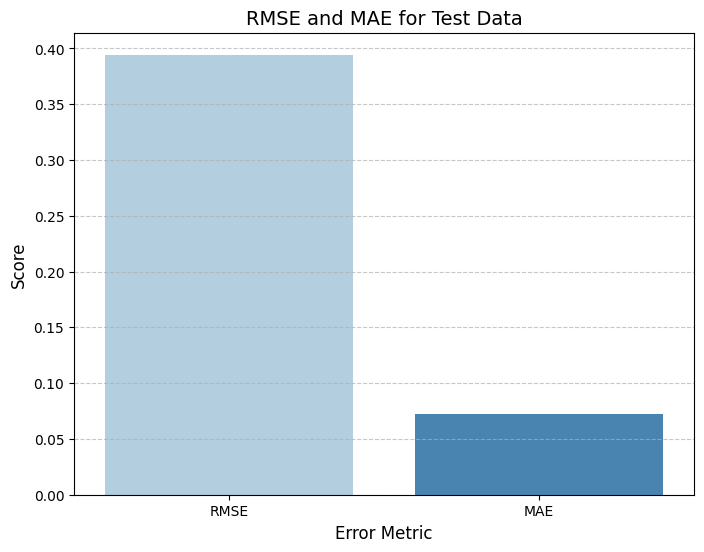

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

error_metrics_df = pd.DataFrame({
    "Metric": ["RMSE", "MAE"],
    "Score": [test_rmse, test_mae]
})

plt.figure(figsize=(8, 6))
sns.barplot(x="Metric", y="Score", data=error_metrics_df, palette="Blues")
plt.title("RMSE and MAE for Test Data", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Error Metric", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [ ]:
def evaluate_at_k(k, true_matrix, approx_matrix):
    precision = precision_at_k(true_matrix, approx_matrix, k)
    recall = recall_at_k(true_matrix, approx_matrix, k)
    map_score = average_precision_at_k(true_matrix, approx_matrix, k)
    return precision, recall, map_score
    print(f"Precision@{k}: {precision:.4f}")
    print(f"Recall@{k}: {recall:.4f}")
    print(f"MAP@{k}: {map_score:.4f}")

In [ ]:
evaluate_at_k(10, test_matrix, test_approx_matrix)

(0.07619047619047618, 0.6540647104612989, 0.48344791067339044)

In [ ]:
evaluate_at_k(5, test_matrix, test_approx_matrix)

(0.1302771855010661, 0.5654533455173114, 0.4783710416173102)

<ipython-input-207-51aefad21cd5>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Metric", y="Score", data=evaluation_metrics_df, palette="Blues")


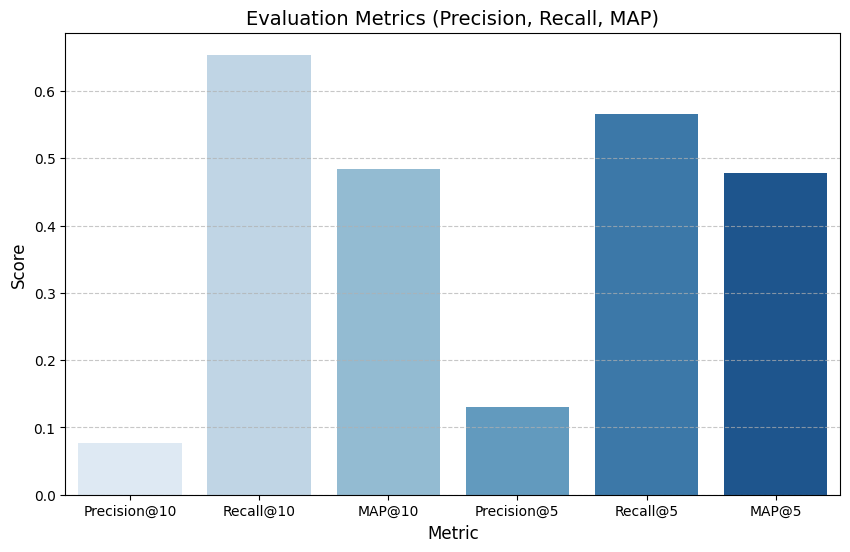

In [ ]:
precision_k_10, recall_k_10, map_k_10 = evaluate_at_k(10, test_matrix, test_approx_matrix)
precision_k_5, recall_k_5, map_k_5 = evaluate_at_k(5, test_matrix, test_approx_matrix)

evaluation_metrics_df = pd.DataFrame({
    "Metric": ["Precision@10", "Recall@10", "MAP@10", "Precision@5", "Recall@5", "MAP@5"],
    "Score": [precision_k_10, recall_k_10, map_k_10, precision_k_5, recall_k_5, map_k_5]
})

# Plot Precision, Recall, and MAP
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", data=evaluation_metrics_df, palette="Blues")
plt.title("Evaluation Metrics (Precision, Recall, MAP)", fontsize=14)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Metric", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Tuning

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(svd, train_matrix, val_matrix=None, test_matrix=None):
    train_svd = svd.fit_transform(train_matrix)
    train_approx_matrix = svd.inverse_transform(train_svd)
    train_rmse = compute_rmse(train_matrix.values, train_approx_matrix)

    val_rmse = None
    if val_matrix is not None:
        val_svd = svd.transform(val_matrix)
        val_approx_matrix = svd.inverse_transform(val_svd)
        val_rmse = compute_rmse(val_matrix.values, val_approx_matrix)

    test_rmse = None
    test_mae = None
    if test_matrix is not None:
        test_svd = svd.transform(test_matrix)
        test_approx_matrix = svd.inverse_transform(test_svd)
        test_rmse = compute_rmse(test_matrix.values, test_approx_matrix)
        test_mae = compute_mae(test_matrix.values, test_approx_matrix)

    return train_rmse, val_rmse, test_rmse, test_mae

In [ ]:
latent_factors_range = np.arange(5, 51, 5)

train_rmse_list = []
val_rmse_list = []

for n_factors in latent_factors_range:
    svd = TruncatedSVD(n_components=n_factors, random_state=42)
    train_rmse, val_rmse, _, _ = evaluate_model(svd, train_matrix, val_matrix)

    train_rmse_list.append(train_rmse)
    val_rmse_list.append(val_rmse)

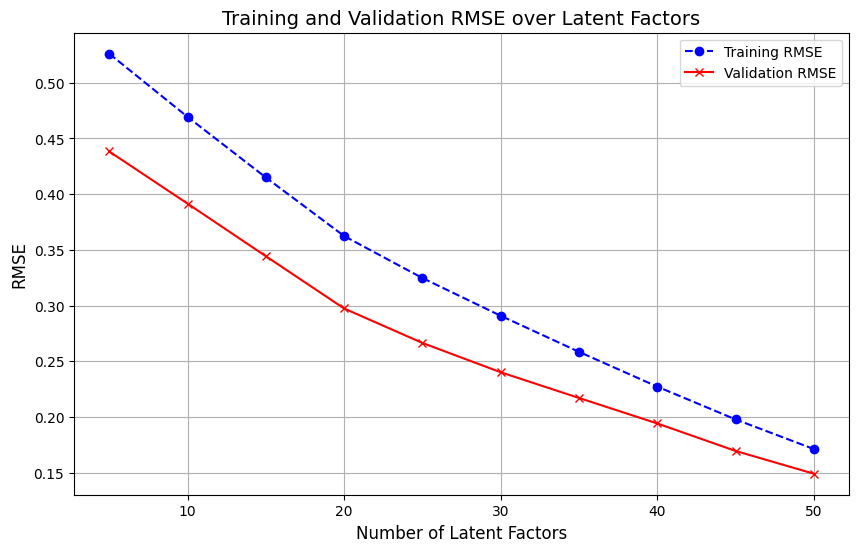

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(latent_factors_range, train_rmse_list, label='Training RMSE', color='blue', marker='o', linestyle='--')
plt.plot(latent_factors_range, val_rmse_list, label='Validation RMSE', color='red', marker='x', linestyle='-')
plt.title('Training and Validation RMSE over Latent Factors', fontsize=14)
plt.xlabel('Number of Latent Factors', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
n_factors = 50
svd_tune = TruncatedSVD(n_components=n_factors, random_state=42)

train_rmse_tune, val_rmse_tune, test_rmse_tune, test_mae_tune = evaluate_model(svd_tune, train_matrix, val_matrix, test_matrix)

print(f"Test RMSE: {test_rmse_tune:.4f}")
print(f"Test MAE: {test_mae_tune:.4f}")

Test RMSE: 0.1428
Test MAE: 0.0139


In [ ]:
test_svd_tune = svd_tune.transform(test_matrix)
test_approx_matrix_tune = svd_tune.inverse_transform(test_svd_tune)

In [ ]:
def evaluate_at_k(k, true_matrix, approx_matrix):
    precision = precision_at_k(true_matrix, approx_matrix, k)
    recall = recall_at_k(true_matrix, approx_matrix, k)
    map_score = average_precision_at_k(true_matrix, approx_matrix, k)
    print(f"Precision@{k}: {precision:.4f}")
    print(f"Recall@{k}: {recall:.4f}")
    print(f"MAP@{k}: {map_score:.4f}")

In [ ]:
evaluate_at_k(10, test_matrix, test_approx_matrix_tune)

Precision@10: 0.1128
Recall@10: 0.9586
MAP@10: 0.9386


In [ ]:
evaluate_at_k(5, test_matrix, test_approx_matrix_tune)

Precision@5: 0.2216
Recall@5: 0.9447
MAP@5: 0.9401


In [ ]:
before_tuning_error = {
    "val_rmse": test_rmse,
    "val_mae": test_mae,
}

before_tuning_evaluation = {
    "val_map": map_k_10,
    "val_precision": precision_k_10,
    "val_recall": recall_k_10,
}

In [ ]:
after_tuning_error = {
    "val_rmse": test_rmse_tune,
    "val_mae": test_mae_tune,
}

after_tuning_evaluation = {
    "val_map": average_precision_at_k(test_matrix, test_approx_matrix_tune, k=10), # Call the function to get the score
    "val_precision": precision_at_k(test_matrix, test_approx_matrix_tune, k=10), # Call the function to get the score
    "val_recall": recall_at_k(test_matrix, test_approx_matrix_tune, k=10), # Call the function to get the score
}

In [ ]:
error_metrics_data = {
    "Metric": ["RMSE", "MAE"],
    "Before Tuning": [before_tuning_error["val_rmse"], before_tuning_error["val_mae"]],
    "After Tuning": [after_tuning_error["val_rmse"], after_tuning_error["val_mae"]],
}

error_metrics_df = pd.DataFrame(error_metrics_data)

In [ ]:
evaluation_metrics_data = {
    "Metric": ["MAP", "Precision", "Recall"],
    "Before Tuning": [
        before_tuning_evaluation["val_map"],
        before_tuning_evaluation["val_precision"],
        before_tuning_evaluation["val_recall"]
    ],
    "After Tuning": [
        after_tuning_evaluation["val_map"],
        after_tuning_evaluation["val_precision"],
        after_tuning_evaluation["val_recall"]
    ],
}

evaluation_metrics_df = pd.DataFrame(evaluation_metrics_data)

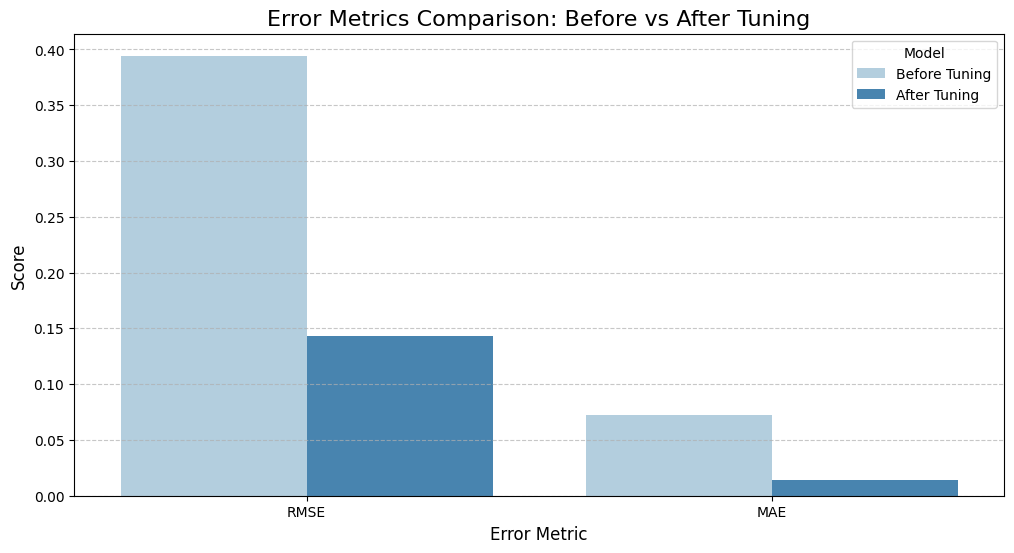

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

error_metrics_melted = error_metrics_df.melt(id_vars="Metric", var_name="Model", value_name="Score")
sns.barplot(data=error_metrics_melted, x="Metric", y="Score", hue="Model", palette="Blues")

plt.title("Error Metrics Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Error Metric", fontsize=12)
plt.legend(title="Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

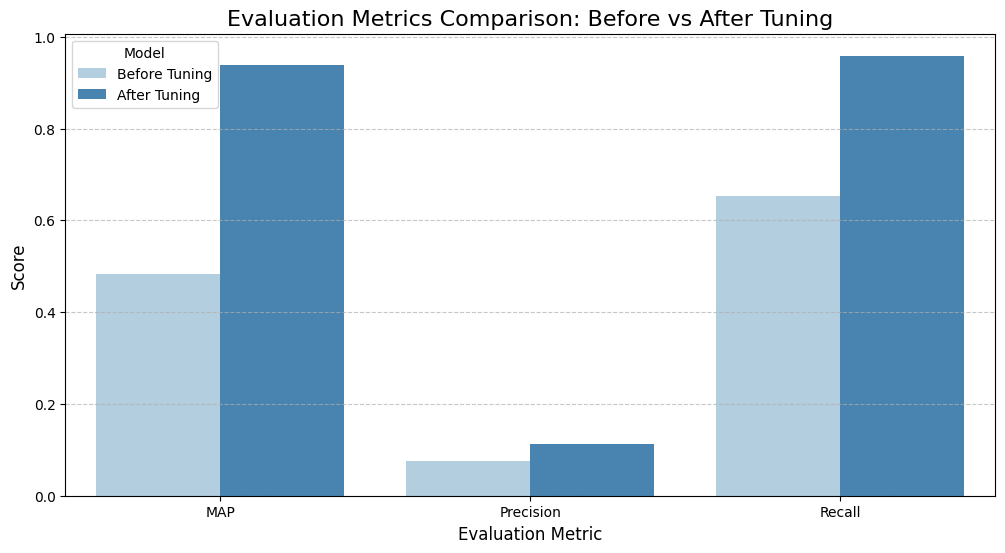

In [ ]:
plt.figure(figsize=(12, 6))

evaluation_metrics_melted = evaluation_metrics_df.melt(id_vars="Metric", var_name="Model", value_name="Score")
sns.barplot(data=evaluation_metrics_melted, x="Metric", y="Score", hue="Model", palette="Blues")

plt.title("Evaluation Metrics Comparison: Before vs After Tuning", fontsize=16)
plt.ylabel("Score", fontsize=12)
plt.xlabel("Evaluation Metric", fontsize=12)
plt.legend(title="Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Rekomendasi Pada User

In [ ]:
def get_user_recommendations(user_id, train_matrix, svd_tune, k=10):
    user_index = train_matrix.index.get_loc(user_id)
    predicted_ratings = svd_tune.transform(train_matrix)[user_index]
    recommended_places = train_matrix.columns[np.argsort(predicted_ratings)[::-1][:k]]
    rated_places = train_matrix.loc[user_id][train_matrix.loc[user_id] > 0].index
    return [place for place in recommended_places if place not in rated_places][:k]

In [ ]:
user_id = 1.047430e+20
recommended_places = get_user_recommendations(user_id, train_matrix, svd_tune, k=10)

print(f"Rekomendasi tempat wisata untuk user {user_id}:")
for idx, place in enumerate(recommended_places, 1):
    print(f"{idx}. {place}")

Rekomendasi tempat wisata untuk user 1.04743e+20:
1. Aek Rangat Pangururan
2. Aek Sipangolu Bakkara
3. Batu Kursi Raja Siallagan ( Stone Chair of King Siallagan )
4. Kaldera Sunset Hill
5. Kebun Raya Samosir, SUMUT
6. Batu Gantung
7. Air Terjun Tombak Pangaribuan
8. BUKIT GIBEON (YAPIM TARUNA)
9. Bukit Beta Tuk-tuk
10. Air Terjun Efrata


In [ ]:
def get_all_user_recommendations(train_matrix, svd_tune, k=10):
    avg_ratings = np.mean(svd_tune.transform(train_matrix), axis=0)
    recommended_places = train_matrix.columns[np.argsort(avg_ratings)[::-1][:k]]
    return recommended_places[:k]

recommended_places_all = get_all_user_recommendations(train_matrix, svd_tune, k=10)

In [ ]:
print("\nRekomendasi tempat wisata berdasarkan rating semua pengguna:")
for idx, place in enumerate(recommended_places_all, 1):
    print(f"{idx}. {place}")


Rekomendasi tempat wisata berdasarkan rating semua pengguna:
1. Aek Rangat Pangururan
2. Air Terjun Janji
3. Bukit Holbung
4. BUKIT GIBEON (YAPIM TARUNA)
5. Bukit Holbung Samosir
6. Batu Lihi Star
7. Bukit Doa
8. Batu Gantung
9. Bukit Pahoda
10. Danau Toba Parapat
